#### Import relevant libraries

In [1]:
import os
import sys
import math
import csv
import time
import bisect
import string
import requests
import random
import bs4 as bs
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
from tensorflow import keras
from bs4 import BeautifulSoup
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import train_test_split
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#import urlopen for web scraping
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

In [3]:
#get list of SP 500 companies
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
#print(table)

In [4]:
#obtain tickers and sectoral classification for a SP 500 companies
tickers = []
sectors = []
names = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        #fourth element is the sector
        sector = row.findAll('td')[3].text
        name = row.findAll('td')[1].text
        
        tickers.append(ticker)
        sectors.append(sector)
        names.append(name)

In [5]:
tickers = list(map(lambda s: s.strip(), tickers))
sectors = list(map(lambda s: s.strip(), sectors))
names = list(map(lambda s: s.strip(), names))

In [6]:
ticker = pd.DataFrame(tickers,columns=['ticker'])
sector = pd.DataFrame(sectors,columns=['sectors'])
name = pd.DataFrame(names,columns=['Security'])
#create dataframe of tickers, sectors and security
#concatenate ticker, sector and name dataframes
data = pd.concat([ticker, sector,name], axis=1, join_axes=[ticker.index])
print(data)

    ticker                 sectors                         Security
0      MMM             Industrials                               3M
1      ABT             Health Care              Abbott Laboratories
2     ABBV             Health Care                           AbbVie
3     ABMD             Health Care                          Abiomed
4      ACN  Information Technology                        Accenture
5     ATVI  Communication Services              Activision Blizzard
6     ADBE  Information Technology                            Adobe
7      AMD  Information Technology           Advanced Micro Devices
8      AAP  Consumer Discretionary               Advance Auto Parts
9      AES               Utilities                         AES Corp
10     AFL              Financials                            Aflac
11       A             Health Care             Agilent Technologies
12     APD               Materials         Air Products & Chemicals
13    AKAM  Information Technology              

In [7]:
#get tickers in each sectoral group
IT = data.loc[data['sectors'] == 'Information Technology']
Finance = data.loc[data['sectors'] == 'Financials']
Manufacturing = data.loc[data['sectors'] == 'Industrials']
COM = data.loc[data['sectors'] == 'Communication Services']

ITticker =  IT['ticker'].tolist()
Financeticker =  Finance['ticker'].tolist()
Manuticker =  Manufacturing['ticker'].tolist()
COMticker =  COM['ticker'].tolist()


print (ITticker)

['ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CDW', 'CDAY', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'DXC', 'ENPH', 'FFIV', 'FIS', 'FISV', 'FLT', 'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP', 'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NLOK', 'NVDA', 'NXPI', 'ORCL', 'PAYX', 'PAYC', 'PYPL', 'PTC', 'QRVO', 'QCOM', 'CRM', 'STX', 'NOW', 'SWKS', 'SNPS', 'TEL', 'TER', 'TXN', 'TRMB', 'TYL', 'VRSN', 'V', 'WDC', 'WU', 'XLNX', 'ZBRA']


In [8]:
#Big Tech Companies
big_tech = ['Apple','Microsoft','Dell Technologies Inc','Meta Platforms','Intel','IBM','HP','Amazon','AT&T']
big_industry = ['Union Pacific','United Parcel Service',
                'Honeywell','Raytheon Technologies','General Electric',
                'Boeing','Caterpillar','3M','Deere & Co.','Lockheed Martin']
big_finance = ['Berkshire Hathaway','JPMorgan Chase','Bank of America',
               'Wells Fargo','Morgan Stanley','Citigroup','Goldman Sachs',
               'BlackRock','Charles Schwab','S&P Global']

In [9]:
#Get Big Tech Tickers
tech_tickers = data[data['Security'].isin(big_tech)] 
#tech_tickers.drop(['sectors','Security'], 1, inplace=True)
print(tech_tickers)

    ticker                 sectors        Security
24    AMZN  Consumer Discretionary          Amazon
44    AAPL  Information Technology           Apple
51       T  Communication Services            AT&T
238    HPQ  Information Technology              HP
249   INTC  Information Technology           Intel
251    IBM  Information Technology             IBM
312     FB  Communication Services  Meta Platforms
318   MSFT  Information Technology       Microsoft


In [10]:
#industry tickers
industry_tickers = data[data['Security'].isin(big_industry)] 
#industry_tickers.drop(['sectors','Security'], 1, inplace=True)
print(industry_tickers)

    ticker      sectors               Security
0      MMM  Industrials                     3M
71      BA  Industrials                 Boeing
91     CAT  Industrials            Caterpillar
141     DE  Industrials            Deere & Co.
212     GE  Industrials       General Electric
234    HON  Industrials              Honeywell
292    LMT  Industrials        Lockheed Martin
396    RTX  Industrials  Raytheon Technologies
460    UNP  Industrials          Union Pacific
463    UPS  Industrials  United Parcel Service


In [11]:
#Big finance tickers
fin_tickers = data[data['Security'].isin(big_finance)] 
#fin_tickers.drop(['sectors','Security'], 1, inplace=True)
print(fin_tickers)

    ticker     sectors            Security
60     BAC  Financials     Bank of America
64   BRK.B  Financials  Berkshire Hathaway
69     BLK  Financials           BlackRock
102   SCHW  Financials      Charles Schwab
112      C  Financials           Citigroup
219     GS  Financials       Goldman Sachs
267    JPM  Financials      JPMorgan Chase
327     MS  Financials      Morgan Stanley
409   SPGI  Financials          S&P Global
486    WFC  Financials         Wells Fargo


In [12]:
tech =  tech_tickers['ticker']
Fin =  fin_tickers['ticker']
industry =  industry_tickers['ticker']

In [13]:
print(tech.to_list())

['AMZN', 'AAPL', 'T', 'HPQ', 'INTC', 'IBM', 'FB', 'MSFT']


In [14]:
print(Fin.to_list())

['BAC', 'BRK.B', 'BLK', 'SCHW', 'C', 'GS', 'JPM', 'MS', 'SPGI', 'WFC']


In [15]:
print(industry.to_list())

['MMM', 'BA', 'CAT', 'DE', 'GE', 'HON', 'LMT', 'RTX', 'UNP', 'UPS']


In [16]:
#finding out which big tech companies are classified as IT
tech_class1  = tech_tickers[tech_tickers['ticker'].isin(ITticker)]
print (tech_class1)

    ticker                 sectors   Security
44    AAPL  Information Technology      Apple
238    HPQ  Information Technology         HP
249   INTC  Information Technology      Intel
251    IBM  Information Technology        IBM
318   MSFT  Information Technology  Microsoft


In [17]:
#finding out which big tech companies are classified as communication services providers
tech_class2  = tech_tickers[tech_tickers['ticker'].isin(COMticker)]
print (tech_class2)

    ticker                 sectors        Security
51       T  Communication Services            AT&T
312     FB  Communication Services  Meta Platforms


In [18]:
import yfinance as yf

In [19]:
#fetch technology companies data from yfinace
tech_data = yf.download("AMZN AAPL T HPQ INTC IBM FB MSFT", start="2005-01-01", end="2021-06-30")
tech_data.head(10)

[*********************100%***********************]  8 of 8 completed


Adj Close                                                 \
                AAPL       AMZN  FB       HPQ        IBM       INTC   
Date                                                                  
2004-12-31  0.985970  44.290001 NaN  6.752494  59.004505  14.577214   
2005-01-03  0.968976  44.520000 NaN  6.778256  58.507710  14.377781   
2005-01-04  0.978927  42.139999 NaN  6.733179  57.879242  14.091103   
2005-01-05  0.987501  41.770000 NaN  6.762156  57.759548  13.953995   
2005-01-06  0.988267  41.049999 NaN  6.749274  57.579964  13.997617   
2005-01-07  1.060223  42.320000 NaN  6.710635  57.328568  14.209516   
2005-01-10  1.055784  41.840000 NaN  6.700973  57.268696  14.259373   
2005-01-11  0.988419  41.639999 NaN  6.456249  56.861729  14.047476   
2005-01-12  1.002199  42.299999 NaN  6.453030  56.987408  14.433877   
2005-01-13  1.068645  42.599998 NaN  6.424049  56.532513  14.221983   

                                     Close             ...       Open  \
                 MSFT          T      AAPL       AMZN  ...       MSFT   
Date                                                   ...              
2004-12-31  19.023306  10.118149  1.150000  44.290001  ...  26.750000   
2005-01-03  19.037550  10.047477  1.130179  44.520000  ...  26.799999   
2005-01-04  19.108746   9.941463  1.141786  42.139999  ...  26.870001   
2005-01-05  19.066025   9.988581  1.151786  41.770000  ...  26.840000   
2005-01-06  19.044670  10.001705  1.152679  41.049999  ...  26.850000   
2005-01-07  18.987713   9.973870  1.236607  42.320000  ...  26.820000   
2005-01-10  19.080263   9.902287  1.231429  41.840000  ...  26.600000   
2005-01-11  19.030428   9.802867  1.152857  41.639999  ...  26.690001   
2005-01-12  19.066025   9.866494  1.168929  42.299999  ...  26.770000   
2005-01-13  18.702936   9.715377  1.246429  42.599998  ...  26.680000   

                           Volume                                              \
                    T        AAPL      AMZN  FB       HPQ      IBM       INTC   
Date                                                                            
2004-12-31  25.799999   278588800   4790700 NaN  11881552  2921687   31951800   
2005-01-03  25.980000   691992000  10446500 NaN  18188740  5538779   64246900   
2005-01-04  25.760000  1096810400  19418500 NaN  20448433  5973706   93729100   
2005-01-05  25.430000   680433600   8354200 NaN  25067788  5906448   73848800   
2005-01-06  25.370001   705555200   8700900 NaN  19883620  4771538   63440900   
2005-01-07  25.250000  2227450400   9836600 NaN  30230818  6485932   82523000   
2005-01-10  25.100000  1725309600   7347900 NaN  18342440  4837855   65393900   
2005-01-11  24.889999  2611627200   7920300 NaN  46168013  4964734  114083400   
2005-01-12  24.590000  1919702400   8072300 NaN  27833500  6096716  143219700   
2005-01-13  24.719999  3164716800  17393600 NaN  21799139  5585012   73856600   

                                 
                 MSFT         T  
Date                             
2004-12-31   54959500   5900300  
2005-01-03   65002900   9900500  
2005-01-04  109442100  11879200  
2005-01-05   72463500  11064500  
2005-01-06   76890500   9020000  
2005-01-07   68723300  10108100  
2005-01-10   70376600  12140100  
2005-01-11   64712000  11070400  
2005-01-12   72940600   9269900  
2005-01-13   89861600  11323300  

[10 rows x 48 columns]

In [20]:
#fetch finance companies data from yfinance
fin_data = yf.download("BAC BRK-B BLK SCHW C GS JPM MS SPGI WFC", start="2005-01-01", end="2021-06-30")
fin_data.head(10)

[*********************100%***********************]  10 of 10 completed


Adj Close                                                          \
                  BAC        BLK      BRK-B           C         GS        JPM   
Date                                                                            
2004-12-31  32.647881  52.550240  58.720001  346.563782  83.085838  24.756443   
2005-01-03  32.279617  51.543606  57.980000  347.211243  83.812569  24.845284   
2005-01-04  31.834961  51.387161  57.099998  344.261993  83.269524  24.589220   
2005-01-05  31.466726  50.911041  57.200001  348.577850  82.894180  24.640446   
2005-01-06  31.418102  54.413948  57.480000  351.958618  84.036186  24.781282   
2005-01-07  31.077644  53.284840  58.380001  349.944611  83.676834  24.582815   
2005-01-10  31.466726  54.543182  58.520000  347.714661  83.836517  24.499594   
2005-01-11  31.390306  54.379929  57.529999  346.851501  83.189651  24.262724   
2005-01-12  31.306931  54.890064  57.520000  345.772583  82.470901  24.320347   
2005-01-13  30.917850  54.583988  57.400002  342.391785  82.207397  24.179512   

                                                       ...    Volume          \
                   MS      SCHW       SPGI        WFC  ...       BAC     BLK   
Date                                                   ...                     
2004-12-31  33.705822  9.344059  32.855705  19.270163  ...   5348800   20400   
2005-01-03  33.936523  9.109674  32.320911  19.195740  ...  10238100   25900   
2005-01-04  33.572266  8.898732  32.310139  19.211245  ...  10264100   24500   
2005-01-05  33.377987  8.844041  32.374752  19.232952  ...  14796100   24600   
2005-01-06  34.167213  8.992485  32.934669  19.301167  ...  14602200  300600   
2005-01-07  34.033672  8.961229  32.880817  19.276360  ...  10547200  147300   
2005-01-10  34.027588  9.015924  33.038769  19.263952  ...  11488600   80400   
2005-01-11  33.663326  8.750290  33.056702  19.226755  ...   8900700   75200   
2005-01-12  33.724342  8.773726  32.758801  18.969397  ...   9709300   45000   
2005-01-13  33.858543  8.578407  32.547020  18.801973  ...  12200500  157400   

                                                                            \
              BRK-B        C       GS       JPM       MS     SCHW     SPGI   
Date                                                                         
2004-12-31   380000   547410  1487400   5754000  2449700  3757400   586600   
2005-01-03   690000  1474660  4225300  14957900  5105800  6296900  1296200   
2005-01-04   825000  1584770  5154200  11360900  6100300  7891700   990800   
2005-01-05  1490000  1893350  3649300   9770200  5072100  5274300  1016800   
2005-01-06   875000  1804990  3590100   9115900  5991400  4557000  1853000   
2005-01-07   705000  1280370  3075000   9971200  4269900  4059500  1435200   
2005-01-10   515000  1699870  2686200   9284500  3733200  4434900  1196000   
2005-01-11   605000  1295270  3132600   8966300  4113800  8698500  1666000   
2005-01-12   420000  1612300  3975800   9075900  4726600  5450800  1387000   
2005-01-13   300000  1543380  3256300   9646600  5402800  7778200   923000   

                      
                 WFC  
Date                  
2004-12-31   2721400  
2005-01-03   8168200  
2005-01-04   9241400  
2005-01-05   7694600  
2005-01-06   8887600  
2005-01-07   6573200  
2005-01-10   7685200  
2005-01-11   7490800  
2005-01-12  11469200  
2005-01-13  10710000  

[10 rows x 60 columns]

In [21]:
#fetch industry companies data from yfinance
industry_data = yf.download("MMM BA CAT DE GE HON LMT RTX UNP UPS", start="2005-01-01", end="2021-06-30")
industry_data.head(10)

[*********************100%***********************]  10 of 10 completed


Adj Close                                                          \
                   BA        CAT         DE          GE        HON        LMT   
Date                                                                            
2004-12-31  36.238846  31.204494  26.293102  171.926651  22.921070  34.168427   
2005-01-03  35.678841  30.423655  25.777147  172.350677  22.849865  33.344185   
2005-01-04  34.985847  30.087639  25.162233  170.278076  22.442068  32.778313   
2005-01-05  35.566849  29.511608  24.918373  169.241791  22.377337  33.602547   
2005-01-06  35.335838  29.946838  25.264709  170.607819  22.228451  33.528717   
2005-01-07  35.216839  29.882812  24.914845  169.571503  22.144302  33.688644   
2005-01-10  35.685852  29.607628  24.801748  169.147537  22.073093  33.830124   
2005-01-11  35.573841  29.198004  24.473087  166.745316  22.008368  33.891628   
2005-01-12  36.357838  29.559624  24.738134  168.064240  22.642727  34.322189   
2005-01-13  35.440849  29.716436  24.932516  165.944565  22.383801  34.045403   

                                                        ...   Volume           \
                  MMM        RTX        UNP        UPS  ...       BA      CAT   
Date                                                    ...                     
2004-12-31  52.001389  22.118017  12.120708  53.050091  ...  1675700  1650200   
2005-01-03  52.210472  22.043112  12.154951  52.764519  ...  3749900  6294000   
2005-01-04  51.785969  21.788445  11.859374  52.094090  ...  4657900  7579400   
2005-01-05  51.152332  21.625790  11.751229  51.988567  ...  5336700  5932800   
2005-01-06  51.614899  21.638643  11.823322  51.932705  ...  3076700  6300400   
2005-01-07  52.147125  21.405365  11.679136  51.833374  ...  1957100  5815400   
2005-01-10  53.186272  21.345446  11.679136  51.907852  ...  2877800  4818800   
2005-01-11  53.674168  21.435322  11.596227  51.709244  ...  2044100  5896000   
2005-01-12  53.832577  21.816257  11.527739  47.910187  ...  4126100  8387600   
2005-01-13  53.091240  21.529490  11.172678  47.239780  ...  4252500  6702200   

                                                                           \
                 DE       GE      HON      LMT      MMM      RTX      UNP   
Date                                                                        
2004-12-31  1465200  1711021  1675426  1957500  1440800  3056600  4180400   
2005-01-03  3536400  2889783  4043448  5258500  3192000  7464486  7762400   
2005-01-04  3272600  2450188  5340007  9493800  3644600  7562687  8108400   
2005-01-05  2466600  2464423  5563006  6969900  2895300  7554424  5504800   
2005-01-06  3605200  2487485  4196904  3024800  3014500  6265109  5653600   
2005-01-07  5093800  1950520  3844889  2158100  3293000  5842435  3998000   
2005-01-10  3919800  2138825  4645103  3109700  4343700  6066484  5392000   
2005-01-11  2862000  2458235  4769085  3680200  4757100  5552919  4254400   
2005-01-12  3152200  2987335  5983619  3046700  4183500  9193954  6765200   
2005-01-13  2956400  1876264  3690594  2770900  4172400  5377176  6865600   

                      
                 UPS  
Date                  
2004-12-31   1196800  
2005-01-03   2176500  
2005-01-04   3127400  
2005-01-05   2130700  
2005-01-06   1773600  
2005-01-07   2396900  
2005-01-10   2170200  
2005-01-11   1897000  
2005-01-12  22627900  
2005-01-13   9028300  

[10 rows x 60 columns]

#### This project uses only the close price for analysis from the downloaded data, for all companies.

#### Data Visualisation of Close Price using line graphs for all companies by sector

##### Big Tech Companies Close Price shows that Amazon price has skyrocketed since 2015/16 and was significantly higher than the prices for the stocks of other companies in the Big Tech category. This is understandable since Amazon has grown to be one of only a few tech companies in the US or the world with market capitalisation of more than USD 1 Trillion. Some analysts note that Amazon's stock price is so high because its share count is low relative to its high market capitalisation and that the stock price could be lowered by splitting the share to increase the total number of shares oustanding. It is also noted that investors are willing to pay a higher premium for the company because they expect to grow even bigger in the future. When you look at the market capitalisation of Micorsoft (USD 2.4 Trilion) vs Amazon (USD 1.7 Trillion) it is clear that the fact that Amazon has extremely lower shares outstanding is the reason why the Amazon stock price is so high compared to Micorsoft and other tech companies of relatively similar market capitalisation.

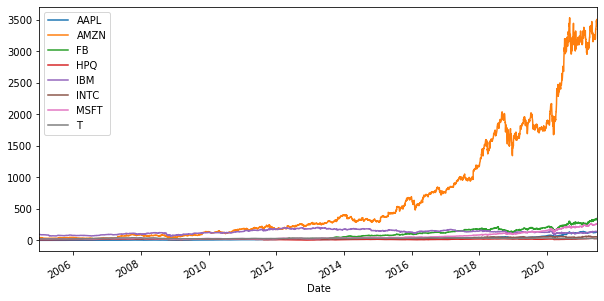

In [22]:
#plot close price for Big Tech
tech_data['Close'].plot(figsize=(10, 5))

##### Plot of Big Finance Companies Close Price shows that Blackrock stock is relatively more expensive. Citigroup was the most expensive before the global financial crisis of 2008/09 then the share price fell significantly and has been closer to the lower band up to the end of the study period.Analysts generally argue that BlackRock stock price is justified and below its estimated fair value. BlackRock is expectedly the only outright outlier in that regard.

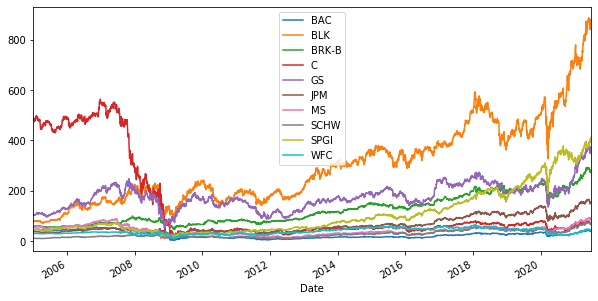

In [23]:
#plot close price for Big Finance
fin_data['Close'].plot(figsize=(10, 5))

##### Plot of big industry companies' data shows that the companies stock prices are generally very close together and there is no outright outlier. The prices show an upward trend since the global financial crises up to the onset of the COVID-19 pandemic in 2020 and tbeginning to trend upward in 2021 as economies generally start to recover.

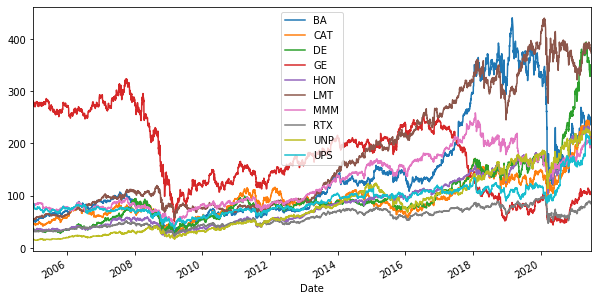

In [24]:
#plot close price for Big Industry
industry_data['Close'].plot(figsize=(10, 5))

In [25]:
#Drop all columns and leave close price for Big Tech
tech_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)
tech_data.head(10)

Close                                                 \
                AAPL       AMZN  FB       HPQ        IBM       INTC   
Date                                                                  
2004-12-31  1.150000  44.290001 NaN  9.523161  94.244743  23.389999   
2005-01-03  1.130179  44.520000 NaN  9.559491  93.451241  23.070000   
2005-01-04  1.141786  42.139999 NaN  9.495913  92.447418  22.610001   
2005-01-05  1.151786  41.770000 NaN  9.536785  92.256210  22.389999   
2005-01-06  1.152679  41.049999 NaN  9.518619  91.969406  22.459999   
2005-01-07  1.236607  42.320000 NaN  9.464124  91.567879  22.799999   
2005-01-10  1.231429  41.840000 NaN  9.450500  91.472275  22.879999   
2005-01-11  1.152857  41.639999 NaN  9.105359  90.822182  22.540001   
2005-01-12  1.168929  42.299999 NaN  9.100817  91.022942  23.160000   
2005-01-13  1.246429  42.599998 NaN  9.059946  90.296364  22.820000   

                                  
                 MSFT          T  
Date                              
2004-12-31  26.719999  25.770000  
2005-01-03  26.740000  25.590000  
2005-01-04  26.840000  25.320000  
2005-01-05  26.780001  25.440001  
2005-01-06  26.750000  25.150000  
2005-01-07  26.670000  25.080000  
2005-01-10  26.799999  24.900000  
2005-01-11  26.730000  24.650000  
2005-01-12  26.780001  24.809999  
2005-01-13  26.270000  24.430000

In [26]:
#Drop all columns and leave close price for Big Finance
fin_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)
fin_data.head(10)

Close                                                \
                  BAC        BLK      BRK-B           C          GS   
Date                                                                  
2004-12-31  46.990002  77.260002  58.720001  481.799988  104.040001   
2005-01-03  46.459999  75.779999  57.980000  482.700012  104.949997   
2005-01-04  45.820000  75.550003  57.099998  478.600006  104.269997   
2005-01-05  45.290001  74.849998  57.200001  484.600006  103.800003   
2005-01-06  45.220001  80.000000  57.480000  489.299988  105.230003   
2005-01-07  44.730000  78.339996  58.380001  486.500000  104.779999   
2005-01-10  45.290001  80.190002  58.520000  483.399994  104.980003   
2005-01-11  45.180000  79.949997  57.529999  482.200012  104.169998   
2005-01-12  45.060001  80.699997  57.520000  480.700012  103.269997   
2005-01-13  44.500000  80.250000  57.400002  476.000000  102.940002   

                                                               
                  JPM         MS   SCHW       SPGI        WFC  
Date                                                           
2004-12-31  39.009998  55.520000  11.96  45.770000  31.075001  
2005-01-03  39.150002  55.900002  11.66  45.025002  30.955000  
2005-01-04  38.410000  55.299999  11.39  45.009998  30.980000  
2005-01-05  38.490002  54.980000  11.32  45.099998  31.014999  
2005-01-06  38.709999  56.279999  11.51  45.880001  31.125000  
2005-01-07  38.400002  56.060001  11.47  45.805000  31.084999  
2005-01-10  38.270000  56.049999  11.54  46.025002  31.065001  
2005-01-11  37.900002  55.450001  11.20  46.049999  31.004999  
2005-01-12  37.990002  55.279999  11.23  45.634998  30.590000  
2005-01-13  37.770000  55.500000  10.98  45.340000  30.320000

In [27]:
#Drop all columns and leave close price for Big Tech
industry_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)
industry_data.head(10)

Close                                                          \
                   BA        CAT         DE          GE        HON        LMT   
Date                                                                            
2004-12-31  51.770000  48.755001  37.200001  280.769226  33.758816  55.549999   
2005-01-03  50.970001  47.535000  36.470001  281.461548  33.653942  54.209999   
2005-01-04  49.980000  47.009998  35.599998  278.076935  33.053322  53.290001   
2005-01-05  50.810001  46.110001  35.255001  276.384613  32.957985  54.630001   
2005-01-06  50.480000  46.790001  35.744999  278.615387  32.738708  54.509998   
2005-01-07  50.310001  46.689999  35.250000  276.923065  32.614773  54.770000   
2005-01-10  50.980000  46.259998  35.090000  276.230774  32.509899  55.000000   
2005-01-11  50.820000  45.619999  34.625000  272.307678  32.414562  55.099998   
2005-01-12  51.939999  46.185001  35.000000  274.461548  33.348866  55.799999   
2005-01-13  50.630001  46.430000  35.275002  271.000000  32.967518  55.349998   

                                                        
                  MMM        RTX        UNP        UPS  
Date                                                    
2004-12-31  82.070000  32.520454  16.812500  85.459999  
2005-01-03  82.400002  32.410320  16.860001  85.000000  
2005-01-04  81.730003  32.035873  16.450001  83.919998  
2005-01-05  80.730003  31.796728  16.299999  83.750000  
2005-01-06  81.459999  31.815607  16.400000  83.660004  
2005-01-07  82.300003  31.472624  16.200001  83.500000  
2005-01-10  83.940002  31.384520  16.200001  83.620003  
2005-01-11  84.709999  31.516678  16.084999  83.300003  
2005-01-12  84.959999  32.076778  15.990000  77.180000  
2005-01-13  83.790001  31.655128  15.497500  76.099998

In [28]:
#drop close title
tech_data.columns = tech_data.columns.droplevel(0)
tech_data.head(10)

,AAPL,AMZN,FB,HPQ,IBM,INTC,MSFT,T
Date,,,,,,,,
2004-12-31,1.150000,44.290001,NaN,9.523161,94.244743,23.389999,26.719999,25.770000
2005-01-03,1.130179,44.520000,NaN,9.559491,93.451241,23.070000,26.740000,25.590000
2005-01-04,1.141786,42.139999,NaN,9.495913,92.447418,22.610001,26.840000,25.320000
2005-01-05,1.151786,41.770000,NaN,9.536785,92.256210,22.389999,26.780001,25.440001
2005-01-06,1.152679,41.049999,NaN,9.518619,91.969406,22.459999,26.750000,25.150000
2005-01-07,1.236607,42.320000,NaN,9.464124,91.567879,22.799999,26.670000,25.080000
2005-01-10,1.231429,41.840000,NaN,9.450500,91.472275,22.879999,26.799999,24.900000
2005-01-11,1.152857,41.639999,NaN,9.105359,90.822182,22.540001,26.730000,24.650000
2005-01-12,1.168929,42.299999,NaN,9.100817,91.022942,23.160000,26.780001,24.809999


In [29]:
#drop Meta Platforms because it has no data going back to start period
tech_data.drop(['FB'], 1, inplace=True)
tech_data.head(10)

,AAPL,AMZN,HPQ,IBM,INTC,MSFT,T
Date,,,,,,,
2004-12-31,1.150000,44.290001,9.523161,94.244743,23.389999,26.719999,25.770000
2005-01-03,1.130179,44.520000,9.559491,93.451241,23.070000,26.740000,25.590000
2005-01-04,1.141786,42.139999,9.495913,92.447418,22.610001,26.840000,25.320000
2005-01-05,1.151786,41.770000,9.536785,92.256210,22.389999,26.780001,25.440001
2005-01-06,1.152679,41.049999,9.518619,91.969406,22.459999,26.750000,25.150000
2005-01-07,1.236607,42.320000,9.464124,91.567879,22.799999,26.670000,25.080000
2005-01-10,1.231429,41.840000,9.450500,91.472275,22.879999,26.799999,24.900000
2005-01-11,1.152857,41.639999,9.105359,90.822182,22.540001,26.730000,24.650000
2005-01-12,1.168929,42.299999,9.100817,91.022942,23.160000,26.780001,24.809999


In [30]:
#drop close title
fin_data.columns = fin_data.columns.droplevel(0)

In [31]:
fin_data.tail()

,BAC,BLK,BRK-B,C,GS,JPM,MS,SCHW,SPGI,WFC
Date,,,,,,,,,,
2021-06-23,40.200001,865.419983,274.660004,69.650002,361.049988,151.119995,85.870003,72.889999,400.829987,43.959999
2021-06-24,40.830002,867.340027,275.489990,71.320000,368.750000,152.509995,87.080002,73.389999,411.179993,45.180000
2021-06-25,41.619999,874.030029,278.380005,71.550003,368.769989,154.050003,88.400002,73.779999,412.359985,46.380001
2021-06-28,41.560001,878.739990,276.609985,71.510002,368.709991,154.330002,87.699997,73.279999,410.799988,45.790001
2021-06-29,40.889999,873.530029,276.209991,69.680000,372.619995,154.139999,90.639999,73.220001,410.579987,44.790001


In [32]:
#drop close title
industry_data.columns = industry_data.columns.droplevel(0)
industry_data.head(10)

,BA,CAT,DE,GE,HON,LMT,MMM,RTX,UNP,UPS
Date,,,,,,,,,,
2004-12-31,51.770000,48.755001,37.200001,280.769226,33.758816,55.549999,82.070000,32.520454,16.812500,85.459999
2005-01-03,50.970001,47.535000,36.470001,281.461548,33.653942,54.209999,82.400002,32.410320,16.860001,85.000000
2005-01-04,49.980000,47.009998,35.599998,278.076935,33.053322,53.290001,81.730003,32.035873,16.450001,83.919998
2005-01-05,50.810001,46.110001,35.255001,276.384613,32.957985,54.630001,80.730003,31.796728,16.299999,83.750000
2005-01-06,50.480000,46.790001,35.744999,278.615387,32.738708,54.509998,81.459999,31.815607,16.400000,83.660004
2005-01-07,50.310001,46.689999,35.250000,276.923065,32.614773,54.770000,82.300003,31.472624,16.200001,83.500000
2005-01-10,50.980000,46.259998,35.090000,276.230774,32.509899,55.000000,83.940002,31.384520,16.200001,83.620003
2005-01-11,50.820000,45.619999,34.625000,272.307678,32.414562,55.099998,84.709999,31.516678,16.084999,83.300003
2005-01-12,51.939999,46.185001,35.000000,274.461548,33.348866,55.799999,84.959999,32.076778,15.990000,77.180000


In [33]:
#drop rows where information is not available for at least one
tech_data = tech_data.dropna()
fin_data = fin_data.dropna()
industry_data = industry_data.dropna()

## Data standardisation using StandardScaler

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$z = \frac{(x - u}{s}$$

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [34]:
#normalise data for PCA
X = tech_data.values # getting all values for technology companies as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object

In [35]:
Y = fin_data.values # getting all values for finance companies as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object

In [36]:
Z = industry_data.values # getting all values for industry companies as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object

## Principal Component Analysis for Dimensionality Reduction

In [37]:
#obtain principal components for industry companies
x_pca = PCA()
X_pca = x_pca.fit(X_std)

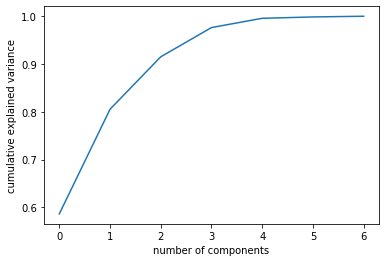

In [38]:
#plot number of components against cumulative variance explained for tech companies
plt.plot(np.cumsum(x_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [39]:
#obtain principal components for finance companies
y_pca = PCA()
Y_pca = y_pca.fit(Y_std)

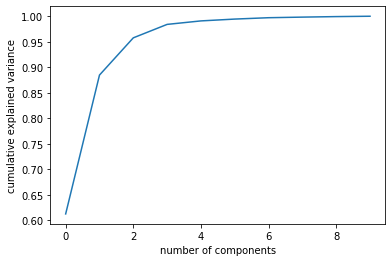

In [40]:
#plot number of components against cumulative variance explained for fin companies
plt.plot(np.cumsum(y_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [41]:
#obtain principal components for industry companies
z_pca = PCA()
Z_pca = z_pca.fit(Z_std)

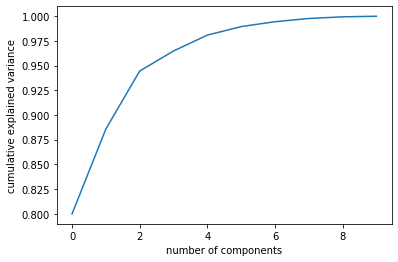

In [42]:
#plot number of components against cumulative variance explained for industry companies
plt.plot(np.cumsum(z_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [43]:
#obtain number of components for technology company
x_pca = PCA(n_components = 0.99)
X_pca = x_pca.fit_transform(X_std) # this will fit and reduce dimensions
print(x_pca.n_components_)

5


In [44]:
#obtain number of components for finance companies
y_pca = PCA(n_components = 0.99)
Y_pca = y_pca.fit_transform(Y_std) # this will fit and reduce dimensions
print(y_pca.n_components_)

5


In [45]:
#obtain number of components for industry companies
z_pca = PCA(n_components = 0.99)
Z_pca = z_pca.fit_transform(Z_std) # this will fit and reduce dimensions
print(z_pca.n_components_)

7


In [46]:
#dataframe of technology components influnce by company
pd.DataFrame(x_pca.components_, columns = tech_data.columns)

,AAPL,AMZN,HPQ,IBM,INTC,MSFT,T
0,0.476471,0.484815,0.286349,0.028564,0.462592,0.485181,0.075675
1,0.040220,-0.023134,-0.309625,0.708709,0.088592,-0.057067,0.623383
2,-0.197839,-0.149029,0.695107,-0.240007,-0.028087,-0.122542,0.618116
3,0.020768,-0.068013,0.581857,0.650677,-0.172767,-0.100906,-0.439288
4,0.443041,0.137561,-0.015519,-0.058285,-0.839796,0.213607,0.173977


In [47]:
#dataframe of finance components influence by company
pd.DataFrame(y_pca.components_, columns = fin_data.columns)

,BAC,BLK,BRK-B,C,GS,JPM,MS,SCHW,SPGI,WFC
0,0.076274,0.388294,0.390908,-0.113267,0.358314,0.396528,0.189540,0.395884,0.367811,0.253404
1,0.586018,-0.113929,-0.116093,0.573292,0.133773,-0.012483,0.524940,-0.027247,-0.001298,-0.084288
2,-0.022575,0.158340,0.038137,-0.085702,-0.091728,0.090197,0.043599,-0.054015,0.406476,-0.882626
3,-0.189927,0.048581,-0.247876,-0.240616,0.757491,-0.185296,0.197684,0.063046,-0.368419,-0.235193
4,0.400004,-0.313188,0.021647,-0.164480,-0.065903,0.331967,-0.315636,0.546166,-0.383419,-0.234328


In [48]:
#dataframe of industry components influence by company
pd.DataFrame(z_pca.components_, columns = industry_data.columns)

,BA,CAT,DE,GE,HON,LMT,MMM,RTX,UNP,UPS
0,0.310111,0.323254,0.319775,-0.187984,0.349852,0.336570,0.318942,0.319650,0.346849,0.319162
1,-0.068661,0.093452,0.160239,-0.884031,-0.044415,-0.050917,-0.298428,-0.196407,0.082084,-0.201067
2,-0.470575,0.350676,0.477670,0.234442,0.041680,-0.152917,-0.279209,-0.299573,0.030790,0.422710
3,-0.425650,-0.575062,-0.149731,-0.132936,0.160494,0.439367,0.164569,-0.263002,0.212889,0.296070
4,-0.567964,0.052241,-0.144067,-0.182510,-0.148303,-0.351125,0.250774,0.629498,0.098428,0.080604
5,-0.062181,-0.207842,0.073927,0.186871,0.206628,0.195937,-0.704433,0.449242,0.303976,-0.202528
6,-0.388292,0.222182,0.261342,0.117143,0.101251,0.413411,0.274726,-0.019117,-0.171168,-0.656919


In [49]:
x_pcs= x_pca.n_components_ # get number of components
# get the index of the most important feature on EACH component
most_important = [np.abs(x_pca.components_[i]).argmax() for i in range(x_pcs)]
initial_feature_names = tech_data.columns
# get the most important feature names
x_most_important_names = [initial_feature_names[most_important[i]] for i in range(x_pcs)]
print(x_most_important_names)

['MSFT', 'IBM', 'HPQ', 'IBM', 'INTC']


In [50]:
y_pcs= y_pca.n_components_ # get number of components
# get the index of the most important feature on EACH component
most_important = [np.abs(y_pca.components_[i]).argmax() for i in range(y_pcs)]
initial_feature_names = fin_data.columns
# get the most important feature names
y_most_important_names = [initial_feature_names[most_important[i]] for i in range(y_pcs)]
print(y_most_important_names)

['JPM', 'BAC', 'WFC', 'GS', 'SCHW']


In [51]:
z_pcs= z_pca.n_components_ # get number of components
# get the index of the most important feature on EACH component
most_important = [np.abs(z_pca.components_[i]).argmax() for i in range(z_pcs)]
initial_feature_names = industry_data.columns
# get the most important feature names
z_most_important_names = [initial_feature_names[most_important[i]] for i in range(z_pcs)]
print(z_most_important_names)

['HON', 'GE', 'DE', 'CAT', 'RTX', 'MMM', 'UPS']


In [52]:
#create dataframe of principal components technology companies
techcomponents = pd.DataFrame(data = X_pca
             , columns = ['PX1', 'PX2','PX3','PX4','PX5'])
techcomponents.tail()

,PX1,PX2,PX3,PX4,PX5
4147,6.499715,-1.099554,-0.482604,1.005834,1.031733
4148,6.524522,-1.077360,-0.427461,1.030640,0.974160
4149,6.489723,-1.050689,-0.377450,1.083800,0.966811
4150,6.630613,-1.092903,-0.396290,1.046933,0.908196
4151,6.671643,-1.128629,-0.382200,1.105978,0.983883


In [53]:
#create dataframe of principal components for finance companies
fincomponents = pd.DataFrame(data = Y_pca
             , columns = ['PY1', 'PY2','PY3','PY4','PY5'])
fincomponents.tail()

,PY1,PY2,PY3,PY4,PY5
4147,7.957704,1.378670,1.429545,1.056652,-0.172966
4148,8.137599,1.453681,1.372125,1.097145,-0.225184
4149,8.253389,1.506809,1.296910,1.053650,-0.235698
4150,8.214193,1.488732,1.340582,1.069354,-0.232573
4151,8.228180,1.563115,1.414176,1.194613,-0.280786


In [54]:
#create dataframe of principal components for industry companies
industrycomponents =  pd.DataFrame(data = Z_pca
             , columns = ['PZ1', 'PZ2','PZ3','PZ4','PZ5','PZ6','PZ7'])
industrycomponents.tail()

,PZ1,PZ2,PZ3,PZ4,PZ5,PZ6,PZ7
4147,7.405770,0.219266,2.990254,-0.070301,0.129258,0.038510,-0.490375
4148,7.537470,0.188652,3.057935,-0.164931,0.093514,0.000259,-0.505422
4149,7.540254,0.177610,3.019472,-0.075859,0.093018,0.024014,-0.487935
4150,7.462371,0.220494,3.064699,-0.029592,0.104302,-0.062986,-0.442997
4151,7.412450,0.194800,3.130107,0.008760,0.127589,-0.096577,-0.516086


#### Create data frame of all components

In [55]:
#create a dataframe of all components across the sectors
allcomponents = pd.concat([techcomponents,fincomponents,industrycomponents], axis=1)
allcomponents.tail()

,PX1,PX2,PX3,PX4,PX5,PY1,PY2,PY3,PY4,PY5,PZ1,PZ2,PZ3,PZ4,PZ5,PZ6,PZ7
4147,6.499715,-1.099554,-0.482604,1.005834,1.031733,7.957704,1.378670,1.429545,1.056652,-0.172966,7.405770,0.219266,2.990254,-0.070301,0.129258,0.038510,-0.490375
4148,6.524522,-1.077360,-0.427461,1.030640,0.974160,8.137599,1.453681,1.372125,1.097145,-0.225184,7.537470,0.188652,3.057935,-0.164931,0.093514,0.000259,-0.505422
4149,6.489723,-1.050689,-0.377450,1.083800,0.966811,8.253389,1.506809,1.296910,1.053650,-0.235698,7.540254,0.177610,3.019472,-0.075859,0.093018,0.024014,-0.487935
4150,6.630613,-1.092903,-0.396290,1.046933,0.908196,8.214193,1.488732,1.340582,1.069354,-0.232573,7.462371,0.220494,3.064699,-0.029592,0.104302,-0.062986,-0.442997
4151,6.671643,-1.128629,-0.382200,1.105978,0.983883,8.228180,1.563115,1.414176,1.194613,-0.280786,7.412450,0.194800,3.130107,0.008760,0.127589,-0.096577,-0.516086


#### Combine components data with JP Morgan Closing price data for use in further analysis

In [56]:
#get JPM column from big finance dataframe
jpm = fin_data['JPM']
jpm = jpm.reset_index(drop=True)
jpm.head()
jpm.shape

(4152,)

In [57]:
#Concatenate JPM data with PCA components data
data_jpm = pd.concat([allcomponents,jpm], axis=1)
data_jpm.tail()

,PX1,PX2,PX3,PX4,PX5,PY1,PY2,PY3,PY4,PY5,PZ1,PZ2,PZ3,PZ4,PZ5,PZ6,PZ7,JPM
4147,6.499715,-1.099554,-0.482604,1.005834,1.031733,7.957704,1.378670,1.429545,1.056652,-0.172966,7.405770,0.219266,2.990254,-0.070301,0.129258,0.038510,-0.490375,151.119995
4148,6.524522,-1.077360,-0.427461,1.030640,0.974160,8.137599,1.453681,1.372125,1.097145,-0.225184,7.537470,0.188652,3.057935,-0.164931,0.093514,0.000259,-0.505422,152.509995
4149,6.489723,-1.050689,-0.377450,1.083800,0.966811,8.253389,1.506809,1.296910,1.053650,-0.235698,7.540254,0.177610,3.019472,-0.075859,0.093018,0.024014,-0.487935,154.050003
4150,6.630613,-1.092903,-0.396290,1.046933,0.908196,8.214193,1.488732,1.340582,1.069354,-0.232573,7.462371,0.220494,3.064699,-0.029592,0.104302,-0.062986,-0.442997,154.330002
4151,6.671643,-1.128629,-0.382200,1.105978,0.983883,8.228180,1.563115,1.414176,1.194613,-0.280786,7.412450,0.194800,3.130107,0.008760,0.127589,-0.096577,-0.516086,154.139999


In [58]:
#drop nan from dataframe row if at least one column value is nan.
data_jpm.dropna()
data_jpm.tail()

,PX1,PX2,PX3,PX4,PX5,PY1,PY2,PY3,PY4,PY5,PZ1,PZ2,PZ3,PZ4,PZ5,PZ6,PZ7,JPM
4147,6.499715,-1.099554,-0.482604,1.005834,1.031733,7.957704,1.378670,1.429545,1.056652,-0.172966,7.405770,0.219266,2.990254,-0.070301,0.129258,0.038510,-0.490375,151.119995
4148,6.524522,-1.077360,-0.427461,1.030640,0.974160,8.137599,1.453681,1.372125,1.097145,-0.225184,7.537470,0.188652,3.057935,-0.164931,0.093514,0.000259,-0.505422,152.509995
4149,6.489723,-1.050689,-0.377450,1.083800,0.966811,8.253389,1.506809,1.296910,1.053650,-0.235698,7.540254,0.177610,3.019472,-0.075859,0.093018,0.024014,-0.487935,154.050003
4150,6.630613,-1.092903,-0.396290,1.046933,0.908196,8.214193,1.488732,1.340582,1.069354,-0.232573,7.462371,0.220494,3.064699,-0.029592,0.104302,-0.062986,-0.442997,154.330002
4151,6.671643,-1.128629,-0.382200,1.105978,0.983883,8.228180,1.563115,1.414176,1.194613,-0.280786,7.412450,0.194800,3.130107,0.008760,0.127589,-0.096577,-0.516086,154.139999


In [59]:
#Obtain statistics for the components and JPM data
data_jpm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PX1,4152.0,-1.076638e-15,2.025877,-2.310822,-1.289749,-0.920159,0.674348,7.034146
PX2,4152.0,1.957330e-17,1.238571,-2.339305,-1.096933,0.024743,0.951646,2.726884
PX3,4152.0,-5.488010e-16,0.876867,-1.763113,-0.606674,-0.012454,0.517424,2.647880
PX4,4152.0,2.337030e-16,0.654673,-1.566927,-0.542200,-0.034529,0.472433,1.673307
PX5,4152.0,7.727708e-17,0.368457,-1.115208,-0.210659,0.047310,0.194338,1.465985
PY1,4152.0,-6.973655e-17,2.475095,-4.085686,-1.988635,-0.712706,2.020328,8.713149
PY2,4152.0,3.872411e-16,1.650094,-1.950364,-1.107122,-0.625444,0.464833,4.288509
PY3,4152.0,1.127871e-16,0.854449,-1.497752,-0.571597,-0.005481,0.388557,2.923348
PY4,4152.0,6.845306e-17,0.513494,-1.146164,-0.393872,0.029709,0.351936,1.396258
PY5,4152.0,-1.607176e-16,0.261424,-0.891117,-0.167014,0.007023,0.157742,0.947944


In [60]:
#create or assign features for machine learning or deep learning
features = data_jpm.columns.tolist()
#feature_names.remove('Timestamp')
#feature_names.remove('comments')

for column in features:
    print (column)
    #print (data_jpm[column].value_counts(dropna=False))

PX1
PX2
PX3
PX4
PX5
PY1
PY2
PY3
PY4
PY5
PZ1
PZ2
PZ3
PZ4
PZ5
PZ6
PZ7
JPM


In [61]:
print(features)

['PX1', 'PX2', 'PX3', 'PX4', 'PX5', 'PY1', 'PY2', 'PY3', 'PY4', 'PY5', 'PZ1', 'PZ2', 'PZ3', 'PZ4', 'PZ5', 'PZ6', 'PZ7', 'JPM']


#### MODELING LTSM USING ESTIMATED PCA COMPONENTS AND JPM CLOSE PRICE AS PROXY FOR BIG FINANCE

In [66]:
#define split for training and tesing data sets
#training is 75 percent of the data and there are 4152 rows (or samples):
split = 0.75*4152
print(split)

3114.0


In [67]:
#split data into training and testing data
train_df,test_df = data_jpm[1:3114], data_jpm[3114:]

#### Scale data for use in the LTSM using the MinMax Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

$$X_{std} = \frac{X - X.min}{X.max - X.min}$$

Then scaled data is given by:

$$X_{scaled} = X_{std} * (max - min) + min$$

where min, max = feature_range.

##### Code below implements the scaler for the training and testing data. Unfortunately I was not able to get rid of the SettingWithCopyWarning due to mostly inexperience dealing with the issue. Hoepfully I will be able to fix it going forward.

In [68]:
#scaling training data for LTSM
train = train_df
scalers = {}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range = (-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s = np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i] = s_s

C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [69]:
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s = np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i] = s_s

C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\MADO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

#### Use a sliding window approach to transform our series into samples of input past observations and output future observations to use supervised learning algorithms, in this particular case the LTSM algorithm.

In [70]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [71]:
n_past = 10
n_future = 5 
n_features = len(data_jpm.columns)

In [72]:
#Convert both the train and test data into samples using the split_series function
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

#### Set encoder and decoder layers for the LTSM

### Sequence to Sequence Model with one encoder layers and one decoder layers

In [73]:
# oneone: one encoder layer and one decoder layer
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 18)]     0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100), (None, 47600       input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 5, 100)       0           lstm[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 5, 100)       80400       repeat_vec

### Sequence to Sequence Model with two encoder layers and two decoder layers

In [74]:
# twotwo: two encoder layers and two decoder layers
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 18)]     0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 10, 100), (N 47600       input_2[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 100), (None, 80400       lstm_2[0][0]                     
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 5, 100)       0           lstm_3[0][0]                     
____________________________________________________________________________________________